## Ethical Considerations

- The data are publicly available; no consent is required.
- No personally identifiable information (PII) is included.
- We are aware of potential biases in socioeconomic and test score data.
- The data are stored securely and will be deleted when no longer needed.


# Data Processing
Importing Libraries

In [1]:
# import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn for a data visualization library built on matplotlib
import seaborn as sns
#set the plot style
sns.set_style("whitegrid")





## Load the Datasets
Load EdGap datasets

In [2]:
edgap = pd.read_excel('../data/EdGap_data.xlsx')


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Load the school information data

In [3]:
school_information = pd.read_csv('../data/school_information.csv',  encoding='unicode_escape')

/var/folders/sc/pdyvxd7s6yg_4vmwpgn89ld80000gn/T/ipykernel_75413/3707666045.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('../data/school_information.csv',  encoding='unicode_escape')


## Explore the contents of the datasets
Start by looking at the head of each data frame

In [4]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [5]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


If we want to see all the columns, we could change the display option for panda

In [6]:
pd.set_option('display.max_columns', None)
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


Use the info method to check the data types, size of the data frames, and number of missing values.

In [7]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


In [8]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

## Summary
1. The school information dataset is much larger than Edgap dataset. Clearly the EdGap dataset does not includes all the school.
2. There are missing values in each dataset.
3. Each dataset is in a tidy, or long format.
4. The data types of the variables of interest look correct, but the school identifier is an object in the EdGap data set and a float64 in the school information dataset.

# Are the data suitable for answering the question?
we want to perform quick exploratory data analysis to determine wether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing something that will not be productive.

Make a pair plot to explore relationships between the variables.

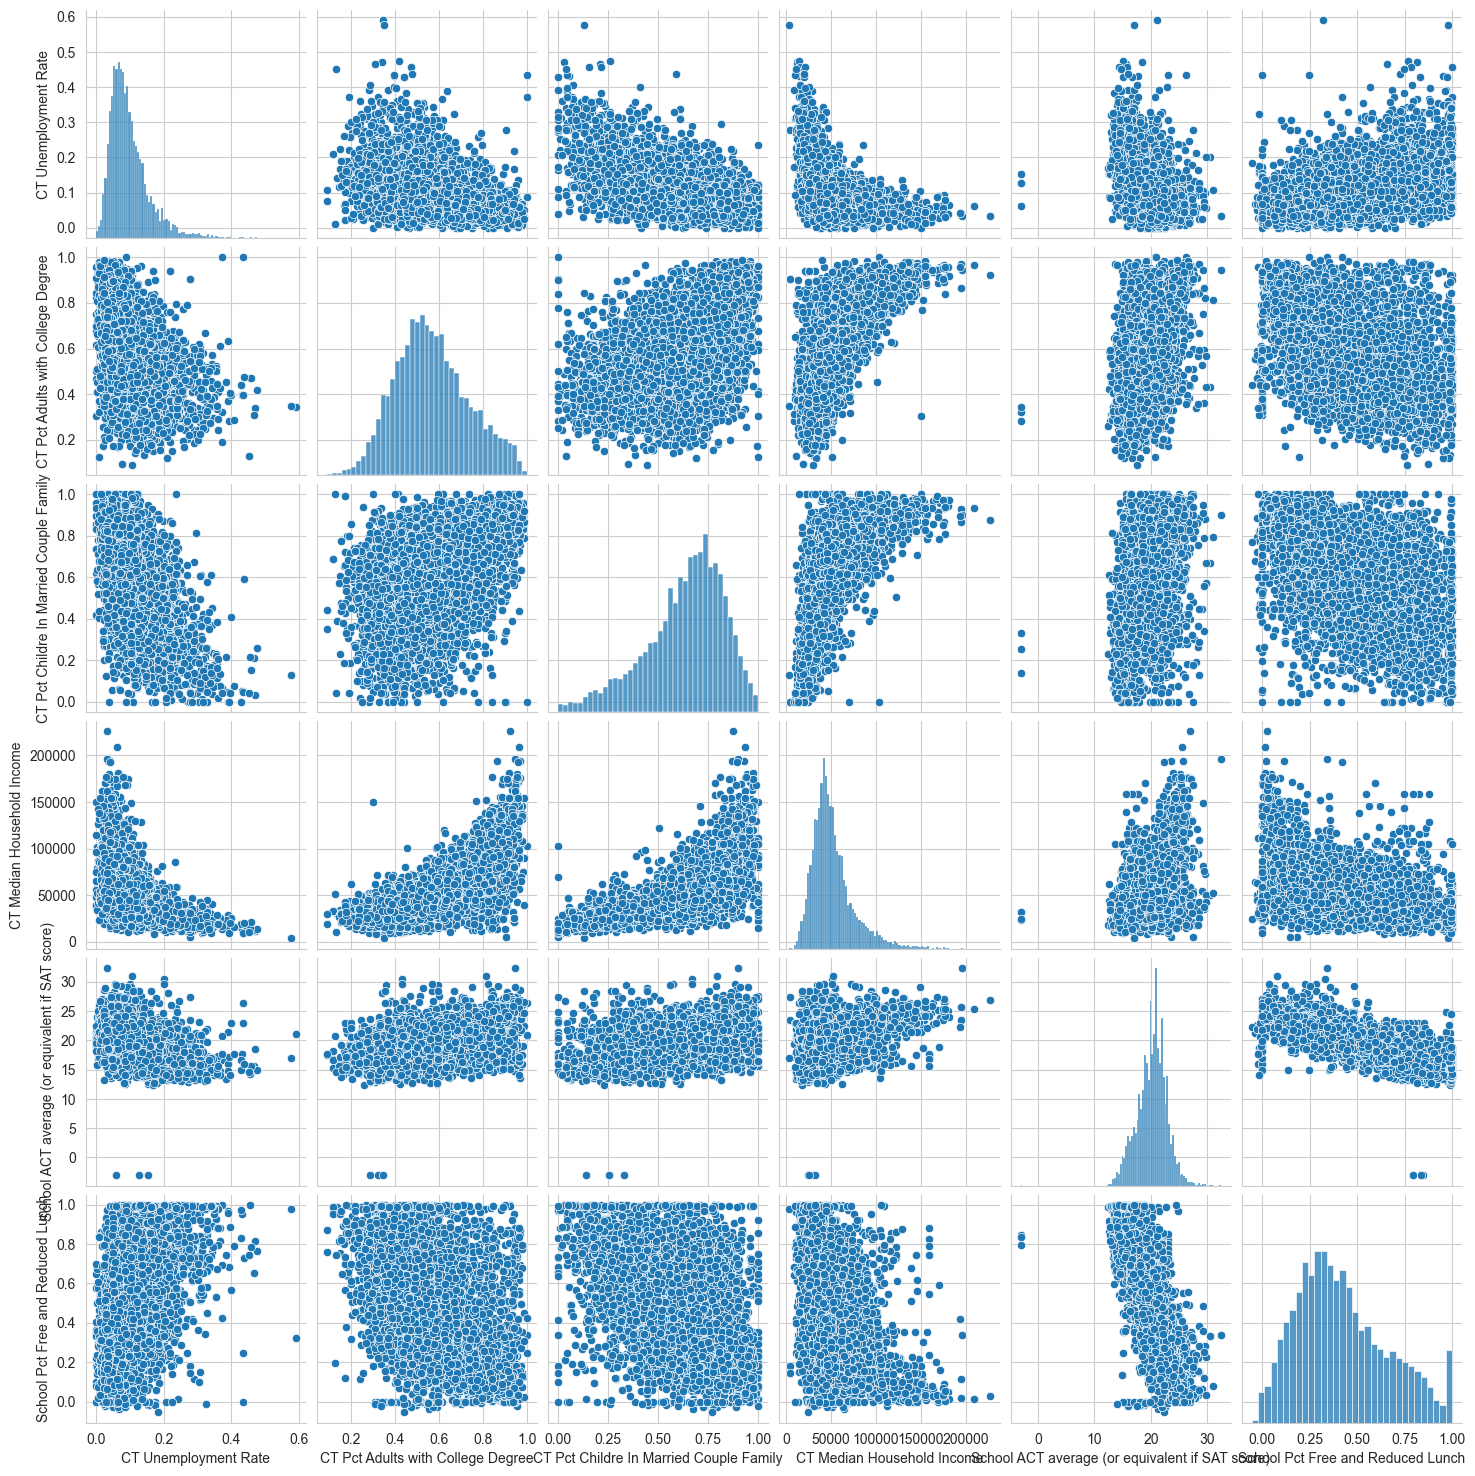

In [9]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

## Add regression lines and format the pair plots

<function matplotlib.pyplot.show(close=None, block=None)>

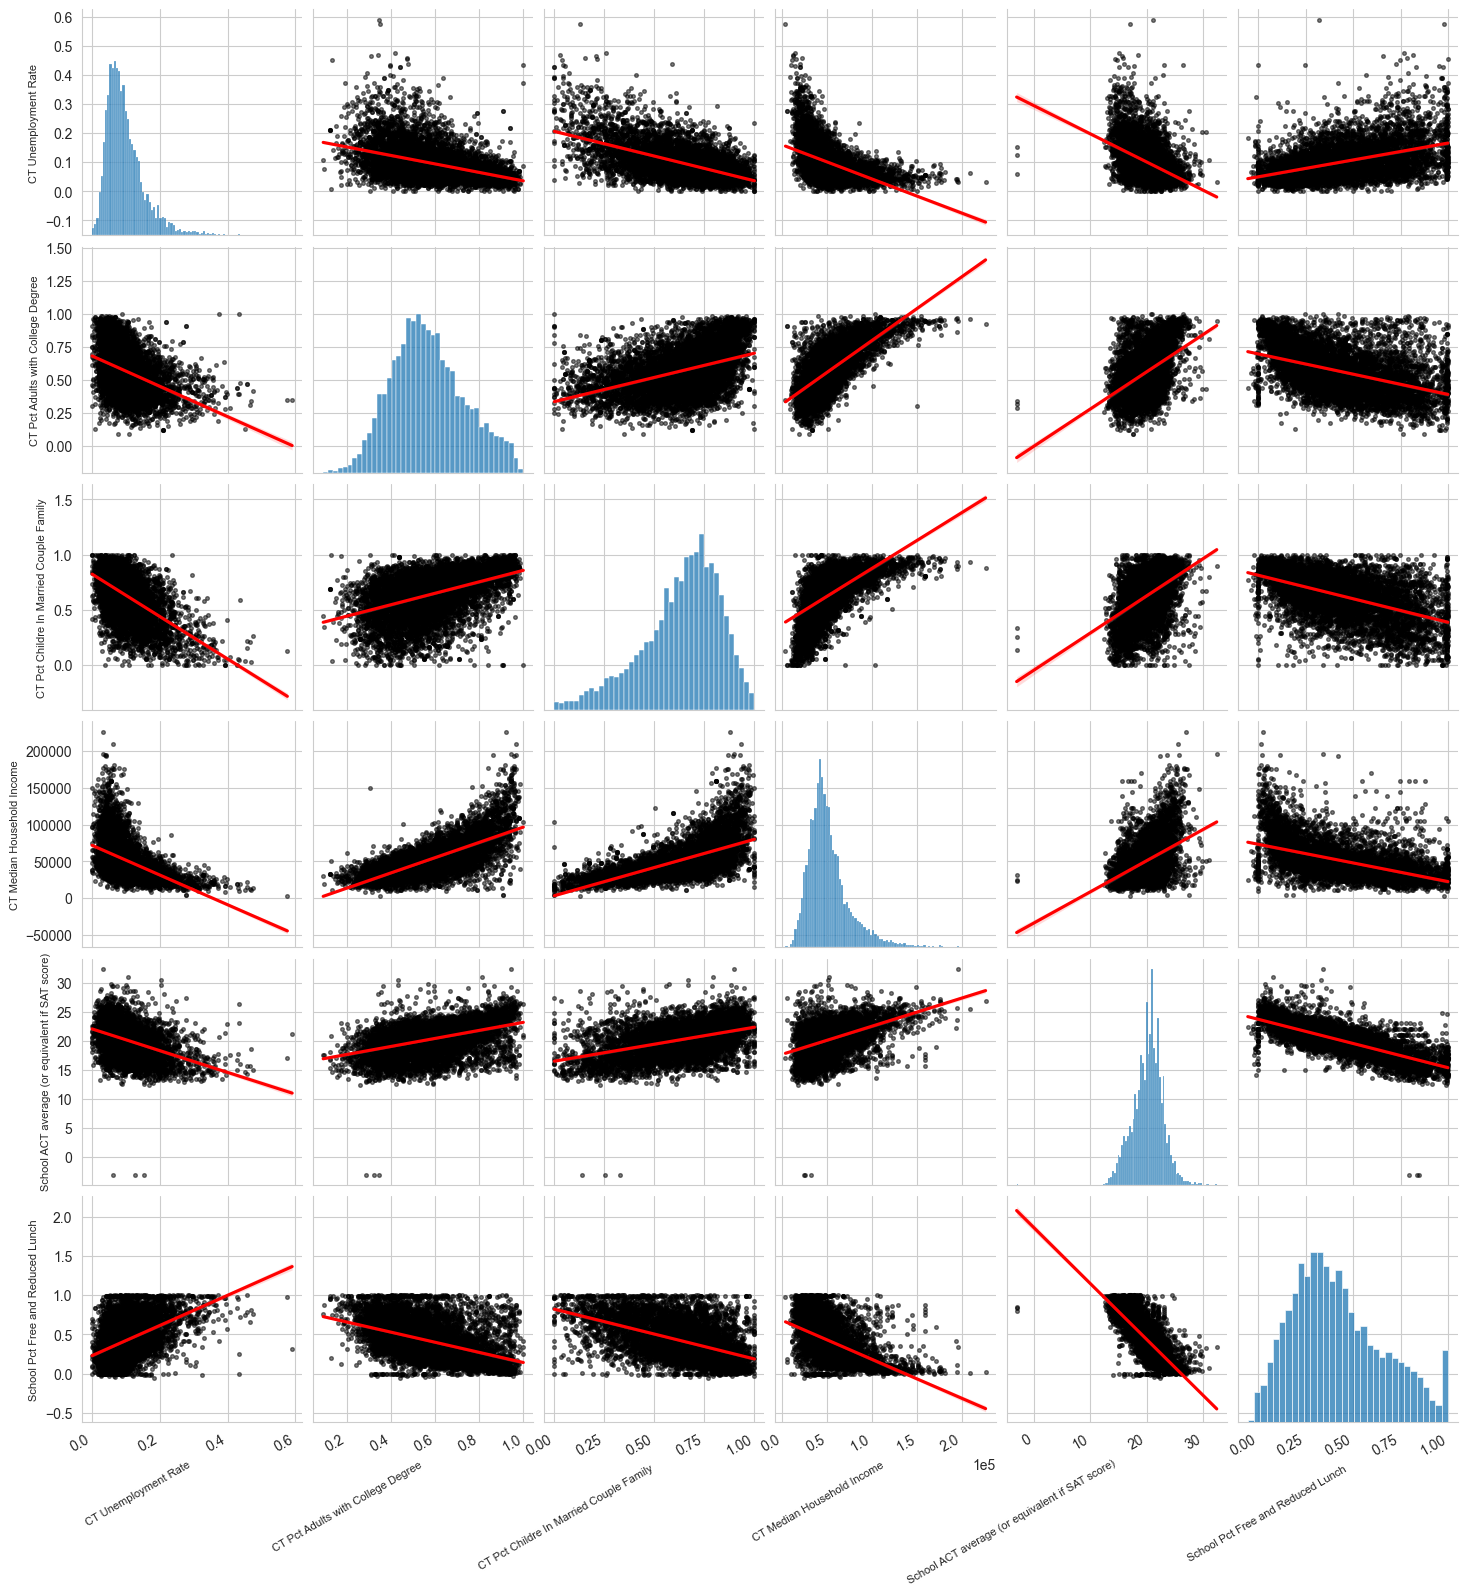

In [10]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "red"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #apply scientific notation 
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # y axis label size

    #rotate x axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show

## Plot a single row
when we're interested in one of the variables being reponse variable or other being predictors in a regression analysis. specify what the Y variable are.

<function matplotlib.pyplot.show(close=None, block=None)>

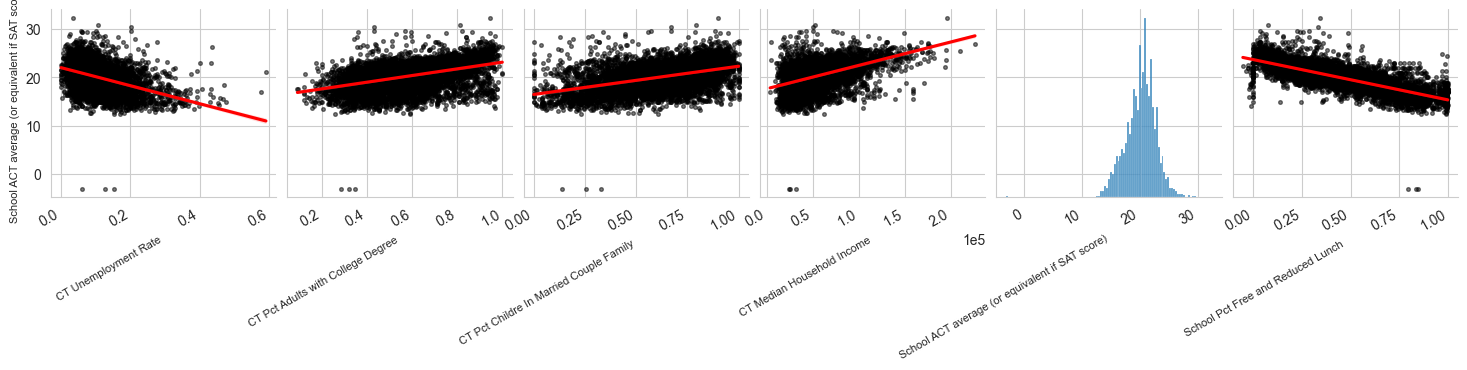

In [11]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "red"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #apply scientific notation 
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # y axis label size

    #rotate x axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show

## Summary
1. There appears to be a relationship between the socioeconomic variable and the ACT score
2. There are some out of range ACT and percent lunch values that will need to be dealt with.
3. We should have confidence that it is worthwhile to spend time preparing the data for analysis.

# Data Preparation
## Select relevant subsets of the data
The school information dataset contain many columns. We only need year, school identity, location and school type information.

Keep the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT


In [12]:
school_information = school_information[
    ["SCHOOL_YEAR", "NCESSCH", "LSTATE", "LZIP", "SCH_TYPE_TEXT", "LEVEL", "CHARTER_TEXT"]
]

school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


## Rename Columns
We will rename the columns to follow best practice of style and being informative. We can do this before and after joining the datasets. We will do it before joining the datasets to make it obvious that the key has the same name in each dataset.

In [13]:
edgap = edgap.rename(
    columns={ 
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)


Rename columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL to year, id, state, zip_code, school_type, school_level

In [14]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter",
    }
)

In [15]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [16]:
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


## Summary
1. We selected a subset of columns of the school information dataset
2. We renamed the columns for clarity and to follow formatting guilines
3. We are ready to join the data frames

# Join Data Frames
We want to join Data frame using the identity of the school as the key. The identity is given by the NCESSCH school identity. The value is the object in Edgap dataset and a float64 in the school information dataset.

We will cast the id column in the school information dataframe as an object

In [17]:
school_information['id']= school_information['id'].astype('object')
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


## Join the dataframe and call the result df.

In [18]:
df = edgap.merge(school_information, how='left', on='id')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [19]:
df.info

<bound method DataFrame.info of                 id  rate_unemployment  percent_college  percent_married  \
0     100001600143           0.117962         0.445283         0.346495   
1     100008000024           0.063984         0.662765         0.767619   
2     100008000225           0.056460         0.701864         0.713090   
3     100017000029           0.044739         0.692062         0.641283   
4     100018000040           0.077014         0.640060         0.834402   
...            ...                ...              ...              ...   
7981  560530200294           0.034549         0.590780         0.720077   
7982  560569000311           0.069538         0.633860         0.808841   
7983  560569500360           0.035159         0.764566         0.776570   
7984  560576200324           0.063877         0.670532         0.879324   
7985  560583000335           0.033553         0.736511         0.821128   

      median_income  average_act  percent_lunch       year state zi

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


## Summary
1. we join the data set using id as key
2. We first cast the id as an object to have the same data type for the key in each data set
3.  We used the left join to keep all EdGap data

## Quality Control
There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.

We can use the describe() method to compute descriptive statistics

In [21]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


## or use the min and max

In [22]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


## Set out of range values to NaN using np.nan.

In [23]:
df.loc[df['percent_lunch']<0, 'percent_lunch'] = np.nan
df.loc[df['average_act']<1, 'average_act'] = np.nan

## Check the types, levels and charter status of schools

In [24]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [25]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [26]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

## keep only the high schools

In [27]:
df = df.loc[df['school_level']=='High']

## Check for any duplicatd rows

In [ ]:
df.duplicated().sum()

np.int64(0)

It is possible that there are incorrectly recorded values in the data set, but we will not go that far in this example.

## Identify Missing Values
Check how many values of each variables are missing?

In [29]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


Check what percentage of values are missing for each variable?

In [30]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name="Percent Missing Values")

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


What states do we have data from?

In [31]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [32]:
df['state'].nunique()

20

Plot the result on the map

In [33]:
import plotly.offline as po
import plotly.graph_objs as pg

In [34]:
layout = dict(
    geo ={'scope':'usa'}, coloraxis_colorbar = dict(title='Number of Schools')
)

data = dict(
    type='choropleth',
    locations=df['state'].value_counts().index,
    locationmode='USA-states',
    z=df['state'].value_counts().values,
    coloraxis='coloraxis'
)

x = pg.Figure(data=[data], layout=layout)
po.iplot(x)

We are missing a large amount of USA data due to omission. This is not evident by examine NaN values in the data set.
 We could obtain it from public records but we will not do that here.

## So We're gonna drop the row where the average ACT score is missing

In [35]:
df = df.dropna(subset=['average_act'])
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variables where datas were present. So, we will not drop the rows of this data set that are missing the socioeconomic variables. We will impute the missing values

## Summary
1. we set out of range value to NaN and will impute them
2. We kept only High Schools
3. We removed school that we do not have the ACT score
4. Many schools are missing from the data by omission
5. We impute the missing values of socioeconomic variables

# DATA IMPUTATION
Define the predictor variables to be rate_unemployment, percent_college, percent_married, median_income, percent_lunch, state, and charter.

In [36]:
predictor_variables= [
    'rate_unemployment', 
    'percent_college', 
    'percent_married', 
    'median_income', 
    'percent_lunch', 
    'state', 
    'charter'
]

We're going to use Iterative imputer to replace missing values in the columns corresponding to predictor variables in analysis

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [38]:
#defining the imputer
imputer = IterativeImputer()

## Fit the imputer using the numerical predictor variables (this can include dummies for categorical variables)

Define the column i want to use in the imputation process


In [39]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print (numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


## Fit the imputer
to learn the relationship between the columns and then we can apply the transform method to replace the values

In [40]:
imputer.fit(df.loc[:, numerical_predictors])

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


## Impute the missing values in the training data

In [41]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

# now we are able to replace the NaN values

Check if we actually are able to replace that value

## Check for Missing Values

In [42]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


No missing value

## Explore the dataset

In [43]:
df.to_csv(
    'education_clean.csv',
    encoding= 'utf-8-sig',
    index= False
)

In [44]:
import os
os.system("open education_clean.csv")  # Mac



0

## Summary
1. We used an interative imputer to estimate missing values of numerical predictor variables
2. We saved the clean data frame as a csv file

In [45]:
# import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn for a data visualization library built on matplotlib
import seaborn as sns
#set the plot style
sns.set_style("whitegrid")

# Model Processing
from sklearn.preprocessing import StandardScaler

#Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model Metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm


In [46]:
df = pd.read_csv('../data/education_clean.csv')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


# Exploratory Data Analysis
## Examine distributions and relationship

plot the correlation matrix of the numerical variables in the training data to explore relationships between variables

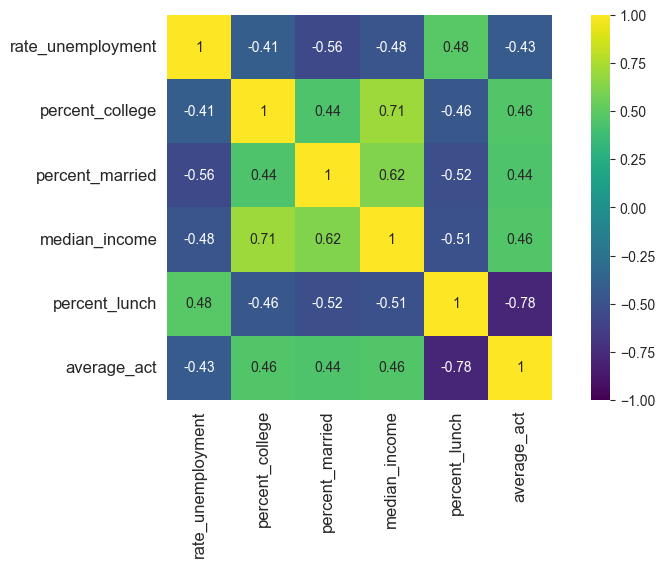

In [47]:
predictor_variables=['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']
numerical_predictors= df[predictor_variables].select_dtypes(include='number').columns.to_list()
corr_matrix = df[numerical_predictors + ['average_act']].corr()
plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.show()

## Make pair plots to explore the relationship between the variables

In [1]:
fig = sns.pairplot(
    data = df,
    vars= numerical_predictors + ['average_act'],
    hue = 'charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}},
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == "CT Median Household Income":
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

    #rotate x axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()


NameError: name 'sns' is not defined

On diagonal, we have distributions of individual numerical predictors. and then we have scatterplot with regression lines that are plotted for the different value of each charter

1. There are relationship between the socioeconomic predictors and ACT average ( bottom row of the pair plot)
2. The relationship are quite similar between the different values wether the school is a charter school or not
3. There are also relationship between socioeconomic variables, as we saw  with the correlation coeffients


## Identify Outliers
We can use the interquartile range to identify outliers. This is also evident in box plots of data. Median income is on a very different scale than the other predictors, so we will make two plot to explore the data

we're gonna make two different plot where one including the values that are between 0 and 1 and then one box plot for median income on a much wider scale

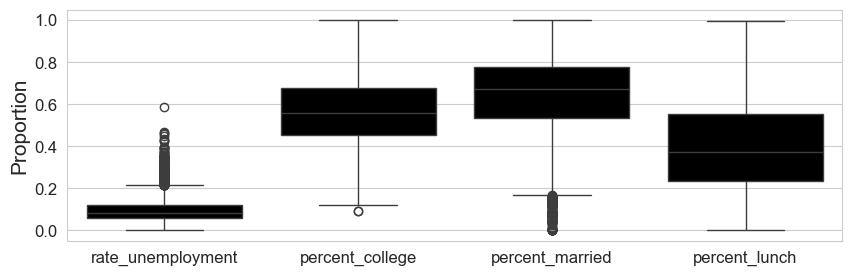

In [49]:
plt.figure(figsize=(10,3))

fractions =list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data =df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)
plt.show()

This boxplot shows the unemployment rate, percent college and percent married do have outliers. However the values doesnt seem so far away from the majority of the data nor do they seems like incorrect values that we wanna exclude them from our analysis.


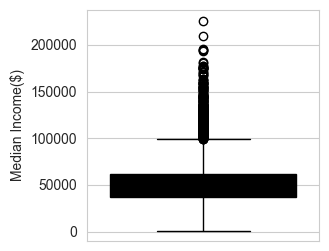

In [50]:
# box plot for median income on a much wider scale

plt.figure(figsize=(3,3))

sns.boxplot( data=df, y='median_income', color='k')

plt.ylabel('Median Income($)')

plt.show()

This box plot also has outliers which is a typical of income distributions. while these values are outliers, they dont look incorrect but we should be mindful that these values are present in data.

## Summary
1. The numerical predictors are related to average ACT.The relationships appear roughly linear
2. The numerical predictors are correlated with each other, suggesting that not all predictors are neccessary
3. Some variable have skewed distributions, suggesting that transformation of input variables might be useful
4. There are outliers in rate unemployment, percent college, percent married, and median income. None of these are obviously incorrect values, they likely reflect skewed distribution. We may consider apply something like a log transformation to these predictors as we explore different models
5. The relationship are similar across charter and non charter schools, but might be significantly different
